In [110]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
im = cv2.imread('elephant.jpg') #Reads an image into BGR format
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape=im.shape
print(im.shape)

(330, 500, 3)


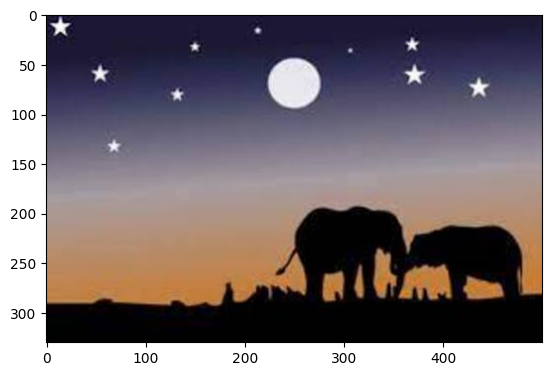

In [111]:
plt.imshow(im) #as RGB format
plt.show()

In [112]:
#Flatten each channel of image
all_pixels=im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [ ]:
from sklearn.cluster import KMeans
dominant_colors=4
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

In [114]:
centers=km.cluster_centers_

In [115]:
centers=np.array(centers,dtype='uint8')
print(centers)

[[ 38  34  64]
 [173 144 129]
 [ 98  93 115]
 [  4   2   2]]


In [116]:
#Plot what all colors are these

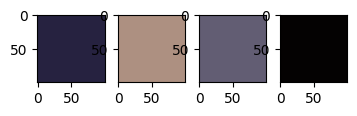

In [117]:
i=1
plt.figure(0,figsize=(4,2))
colors=[]
for each_col in centers:
    plt.subplot(1,4,i)
    i+=1
    colors.append(each_col)
    #Color Swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
plt.show()

In [118]:
#Segmenting Our Original Image

In [119]:
new_img=np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)


(165000, 3)


In [120]:
colors

[array([38, 34, 64], dtype=uint8),
 array([173, 144, 129], dtype=uint8),
 array([ 98,  93, 115], dtype=uint8),
 array([4, 2, 2], dtype=uint8)]

In [121]:
km.labels_

array([0, 0, 3, ..., 3, 3, 3])

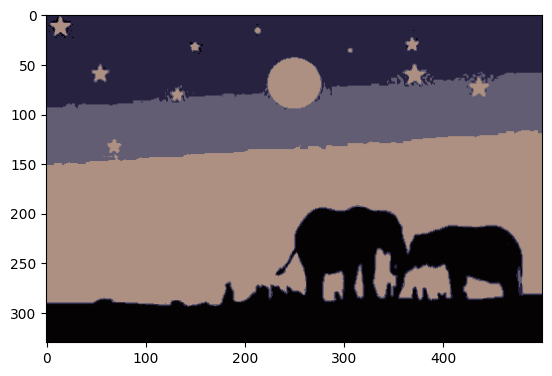

In [122]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
new_img=new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()


